# Exploratory Data Analysis (EDA)

Conduct EDA on the Quora Insincere dataset that is cleaned after performing pre-processing on training and test data set to remove unwanted records, vocabulary, junk content

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two'

In [3]:
eda_file_name = 'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two\\data\\Quora_cleaned.csv'

In [4]:
df = pd.read_csv(eda_file_name)

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(10)

,qid,question_stemmed,target,question_length,total_words
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26
2,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29
3,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32
4,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27
5,04902e91065f7d4a8677,dieudonne wildly popular moroccanfrench comedi...,1,217,28
6,9ccaae85f3f5e037ea8e,job opportunities canada cisco contact center ...,0,217,29
7,93b9389889ad4aa8518a,waz genghiz khanz thee great khanz going get l...,1,217,32
8,6700a979fa215d451fc3,listen everyone next 911 major nuclear attack ...,1,216,34
9,1ef37766a923f24f2182,didnt genghis khan thee great khan abolish des...,1,214,32


In [6]:
#Extract textfields from questions
#raw_questions = []
#for questions in df['question_stemmed']:
#    raw_questions.append(questions)

In [7]:
#raw_questions

In [8]:
#Create a string form of our list of text
#import re


#raw_string = ''.join(raw_questions)
#no_links = re.sub(r'http\S+', '', raw_string)
#no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
#no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [9]:
# No. of values per column
df.count()

qid                 1016694
question_stemmed    1016694
target              1016694
question_length     1016694
total_words         1016694
dtype: int64

In [10]:
# Track Memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016694 entries, 0 to 1016693
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   qid               1016694 non-null  object
 1   question_stemmed  1016694 non-null  object
 2   target            1016694 non-null  int64 
 3   question_length   1016694 non-null  int64 
 4   total_words       1016694 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 197.6 MB


In [11]:
df.dtypes

qid                 object
question_stemmed    object
target               int64
question_length      int64
total_words          int64
dtype: object

### Distributions of Quora data - Sincere vs. Insincere

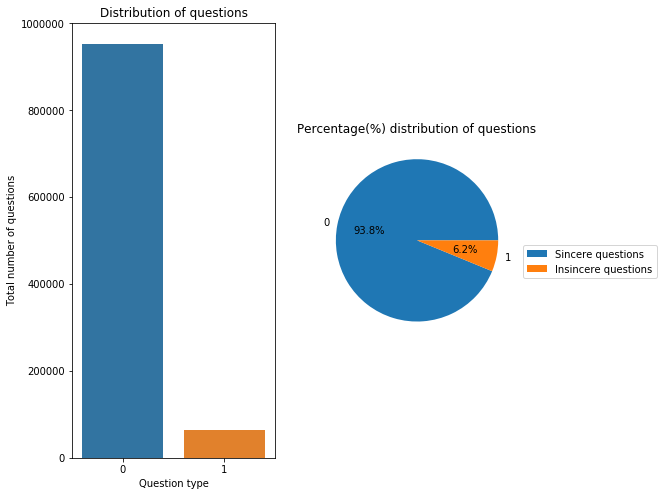

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,8))

count = df['target'].value_counts()
sns.barplot(count.index, count.values, ax = ax[0])
ax[0].set_title('Distribution of questions')
ax[0].set_xlabel('Question type')
ax[0].set_ylabel('Total number of questions')

percentage = (np.array((count / count.sum())*100))
labels = (np.array(count.index))
pie_chart = plt.pie(percentage,labels=labels,autopct='%1.1f%%')
ax[1].set_title('Percentage(%) distribution of questions')

plt.legend(["Sincere questions","Insincere questions"],loc='bottom', bbox_to_anchor=(1, 0.5))
plt.show()

### Check to see if there is a linear relationship between 'Insincere/ Sincere' question and 'Length of question'

### Box plot to visualize 
- Co-relation of 'Total number of words' on 'length of questions' to be able to discern that that questions are actually long because of the total number of words and not due to junk content
(for both 'sincere' and 'insincere' questions indicated by 0 and 1 respectively)

Text(0, 0.5, 'Question Length')

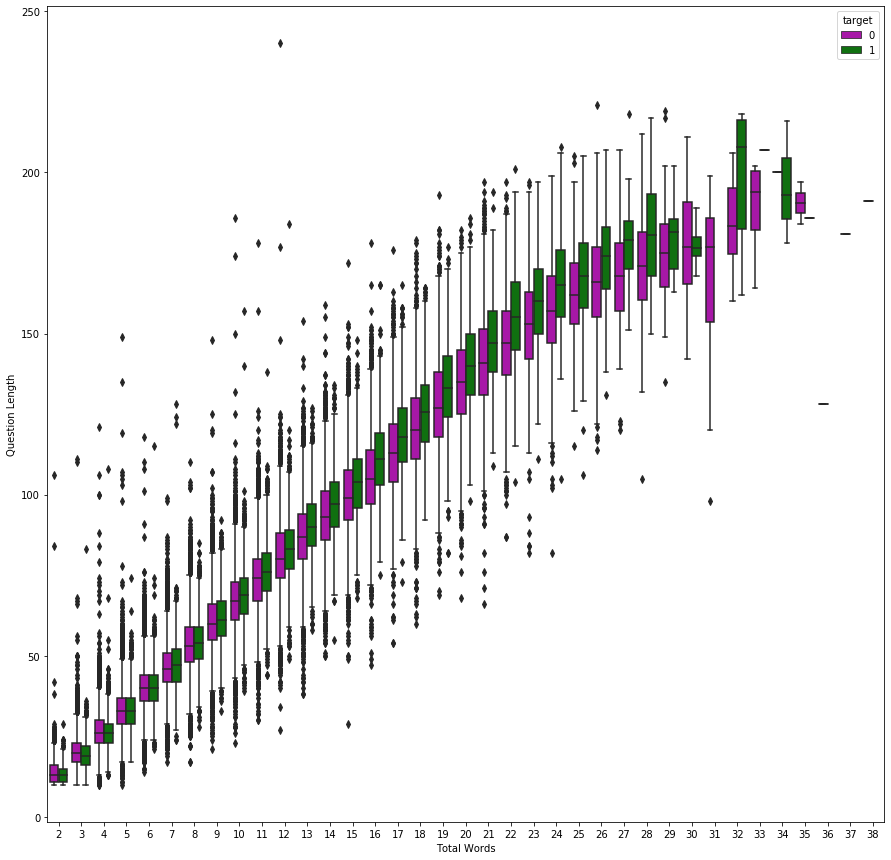

In [13]:
plt.rcParams["figure.figsize"] = (15,15)

ax = sns.boxplot(x="total_words", y="question_length",
            hue="target", palette=["m", "g"],
            data=df)

ax.set_xlabel('Total Words')
ax.set_ylabel('Question Length')

In [14]:
df['question_length'].describe()

count    1.016694e+06
mean     4.393734e+01
std      2.586732e+01
min      1.000000e+01
25%      2.600000e+01
50%      3.700000e+01
75%      5.400000e+01
max      2.400000e+02
Name: question_length, dtype: float64

In [15]:
df['total_words'].describe()

count    1.016694e+06
mean     6.563944e+00
std      3.684738e+00
min      2.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      3.800000e+01
Name: total_words, dtype: float64

### Generate a violin plot and overlay combined plots
To evaluate the spread of questions across:
- 'Length of questions' grouped horizontally by 'Sincere vs Insincere questions'
- 'Total number of words' grouped horizontally by 'Sincere vs Insincere questions'

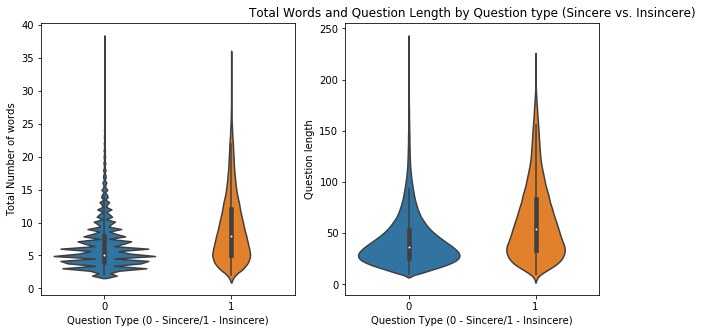

In [16]:
plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(1,2,1)
sns.violinplot(x='target', y='total_words', data=df)

# Overlay a strip plot on the violin plot
#sns.stripplot(x='target', y='total_words', data=df, jitter=True,size=0.5)
plt.xlabel('Question Type (0 - Sincere/1 - Insincere)')
plt.ylabel('Total Number of words')

plt.subplot(1,2,2)
sns.violinplot(x='target', y='question_length', data=df)

# Overlay a strip plot on the violin plot
#sns.stripplot(x='target', y='question_length', data=df, jitter=True,size=0.5)
plt.xlabel('Question Type (0 - Sincere/1 - Insincere)')
plt.ylabel('Question length')

plt.title('Total Words and Question Length by Question type (Sincere vs. Insincere)')
plt.show()

**Inference**:

We can see that the insincere questions have more number of words as well as characters/ question length compared to sincere questions. So this might be a useful feature in our model.

### Joint plot to determine the correlation between the numeric feature columns -  Total words vs question length

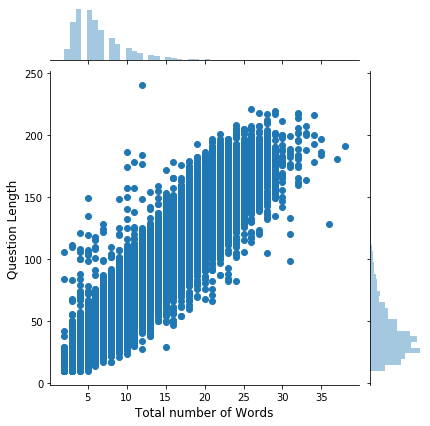

In [17]:
plt.rcParams["figure.figsize"] = (15,15)

h = sns.jointplot(x='total_words',y='question_length',data=df)
h.set_axis_labels('Total number of Words', 'Question Length', fontsize=12)

# Display the plot
plt.show()

In [18]:
number_of_questions = df.groupby(['question_length', 'total_words']).size().reset_index(name="number_of_questions")

In [19]:
number_of_questions.head(5)

,question_length,total_words,number_of_questions
0,10,2,4537
1,10,3,276
2,10,4,3
3,10,5,1
4,11,2,5219


In [20]:
number_of_questions.columns

Index(['question_length', 'total_words', 'number_of_questions'], dtype='object')

In [21]:
number_of_questions.dtypes

question_length        int64
total_words            int64
number_of_questions    int64
dtype: object

### 3D Scatter plot to see density of words, question length by Questions

Text(0.5, 0, 'Number. of questions')

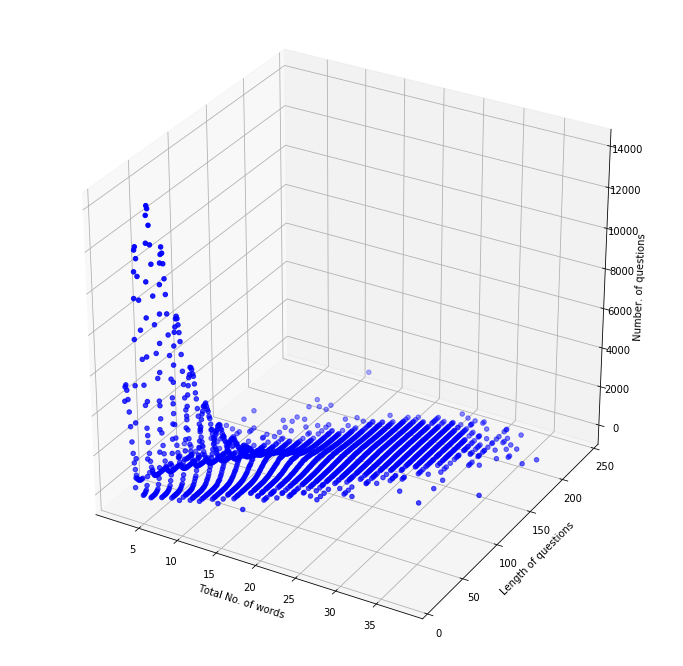

In [22]:
from mpl_toolkits.mplot3d import Axes3D 

plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()

x_val = number_of_questions['total_words']
y_val = number_of_questions['question_length']
z_val = number_of_questions['number_of_questions']

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_val, y_val, z_val, c = 'b', marker='o')
ax.set_xlabel('Total No. of words')
ax.set_ylabel('Length of questions')
ax.set_zlabel('Number. of questions')

### Find most frequently occurring words across the dataframe

In [23]:
commonwords = pd.Series(' '.join(df['question_stemmed']).split()).value_counts()

In [24]:
commonwords.head(10)

get       49532
best      49197
would     48254
people    39885
like      33970
good      30161
india     25314
one       24321
make      21794
think     20853
dtype: int64

### Prepare a word cloud based on word frequencies using worldcloud package

In [25]:
from wordcloud import WordCloud
def plot_wordcloud(text, title = None):
    wordcloud = WordCloud(background_color='white',
                    random_state = 42,
                    width=800, 
                    height=800).generate(str(text))
    
    #Plot
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud);
    plt.axis('off')
    plt.tight_layout(pad = 0) 
    plt.show()

In [26]:
str(df['question_stemmed'])

'0          prospects international students httpwwwophamm...\n1          could probing quantum world vacuum virtual par...\n2          mention good book containing quotations great ...\n3          didnt genghiz khan thee great khan abolish des...\n4          india harbor many scammers thieves con artists...\n                                 ...                        \n1016689                                           space ship\n1016690                                           parts skul\n1016691                                           kinder oth\n1016692                                           women evil\n1016693                                           people fal\nName: question_stemmed, Length: 1016694, dtype: object'

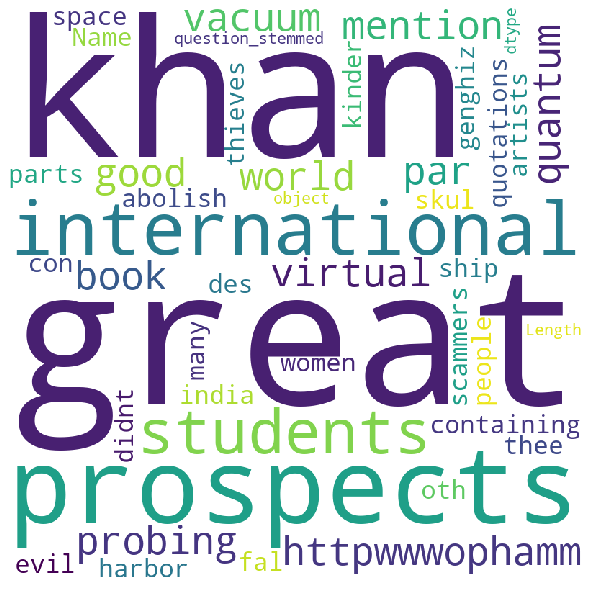

In [27]:
plot_wordcloud(df["question_stemmed"], title="Word Cloud of Questions")

In [29]:
df_insincere = df[df['target']==1]
df_insincere.shape

(63052, 5)

In [30]:
df_sincere = df[df['target']==0]
df_sincere.shape

(953642, 5)

              Frequency
Sincere_Word           
best              48666
get               46989
would             45040
people            30756
like              29516
good              29030
one               23061
india             22774
make              20282
think             17779
much              17023
many              16366
someone           15693
way               15678
work              15313
use               15071
know              14758
year              13865
us                13675
take              13170


Text(0.5, 1.0, 'Sincere questions_word frequency')

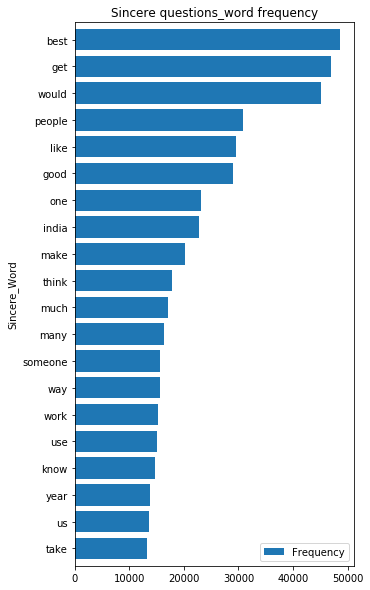

In [32]:
from collections import Counter
words_sincere = (df_sincere.question_stemmed
           .str.cat(sep=' ')
           .split())

# generate DF out of Counter
rslt_sincere = pd.DataFrame(Counter(words_sincere).most_common(20),
                    columns=['Sincere_Word', 'Frequency']).set_index('Sincere_Word').sort_values(by=['Frequency'], ascending=True)

print(rslt_sincere.sort_values(by=['Frequency'], ascending=False))

rslt_sincere.plot.barh(rot=0, figsize=(5,10), width=0.8)
plt.title('Sincere questions_word frequency')

                Frequency
Insincere_Word           
people               9129
women                4613
trump                4539
like                 4454
men                  3260
would                3214
think                3074
white                2796
dont                 2759
many                 2748
indian               2695
quora                2617
get                  2543
india                2540
muslims              2450
black                2403
us                   2358
americans            2080
sex                  2016
world                1881


Text(0.5, 1.0, 'Insincere questions_word frequency')

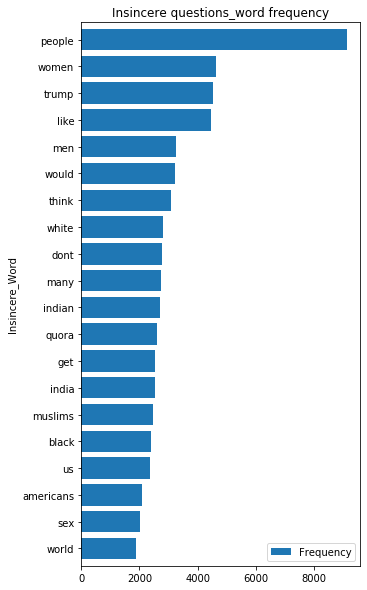

In [33]:
words_insincere = (df_insincere.question_stemmed
           .str.cat(sep=' ')
           .split())

# generate DF out of Counter
rslt_insincere = pd.DataFrame(Counter(words_insincere).most_common(20),
                    columns=['Insincere_Word', 'Frequency']).set_index('Insincere_Word').sort_values(by=['Frequency'], ascending=True)

print(rslt_insincere.sort_values(by=['Frequency'], ascending=False))
# plot
rslt_insincere.plot.barh(rot=0, figsize=(5,10), width=0.8)
plt.title('Insincere questions_word frequency')